✅ Dataset loaded successfully!
Shape: (6350, 28)


,Country,Date,Population,Internet_Penetration (%),Broadband_Speed (Mbps),Mobile_Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Attainment_Index (%),Mobile_Data_Usage (GB per User),Digital_Investment (M USD),...,Device_Penetration (%),Cybersecurity_Incidents (Count),E_Commerce_Penetration (%),Government_Digital_Policy_Index (%),Network_Latency (ms),Cloud_Service_Adoption (%),IoT_Device_Density (per 1000 people),AI_Adoption_Index (%),Data_Privacy_Regulation_Strength (%),Energy_Consumption_for_Connectivity (kWh)
0,Algeria,2015-01-01,25258314,37.436774,46.839032,8.533871,5327.303548,45.489677,2.167742,164.128065,...,68.104839,4174,33.408387,37.136774,77.050645,27.834194,22.950645,15.652581,27.985161,248.871935
1,Algeria,2015-02-01,25258314,37.484286,47.227500,8.687500,5331.729286,45.555714,2.185357,165.386071,...,68.122500,3753,33.520000,37.128214,77.045000,27.856429,22.936429,15.681429,27.989643,248.757500
2,Algeria,2015-03-01,25258314,37.629677,47.436129,8.852903,5342.169032,45.608710,2.182581,166.200645,...,68.108065,4148,33.545806,37.155806,77.120968,27.870968,23.034839,15.686452,27.993548,248.524839
3,Algeria,2015-04-01,25258314,37.257667,47.500000,9.058333,5354.909667,45.643333,2.199000,166.618667,...,68.147000,4032,33.579333,37.120000,77.255333,27.880333,23.083667,15.706667,28.010000,248.497333
4,Algeria,2015-05-01,25258314,37.492258,47.659677,8.886452,5360.973226,45.662258,2.205484,167.409032,...,68.143548,4195,33.598710,37.155484,77.075161,27.930323,23.111290,15.729355,28.018065,248.983548


✅ Cleaned dataset shape: (3278, 29)
✅ Features scaled successfully!
✅ DRS calculated successfully!
✅ Target label created successfully!
Digitally_Ready
0    2435
1     843
Name: count, dtype: int64
Training set: (2928, 8), Testing set: (350, 8)
✅ Random Forest model trained successfully!

📊 MODEL PERFORMANCE
Training Accuracy : 99.97 %
Testing Accuracy  : 98.0 %
OOB Score         : 99.8 %

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       252
           1       1.00      0.93      0.96        98

    accuracy                           0.98       350
   macro avg       0.99      0.96      0.97       350
weighted avg       0.98      0.98      0.98       350


🔁 CROSS-VALIDATION
Mean Accuracy : 86.97 %
Fold Scores   : [np.float64(80.49), np.float64(89.94), np.float64(93.6), np.float64(82.44), np.float64(88.4)]

🔎 OVERFITTING CHECK
✅ Model is balanced and generalizes well.


/tmp/ipython-input-1189966721.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='crest')


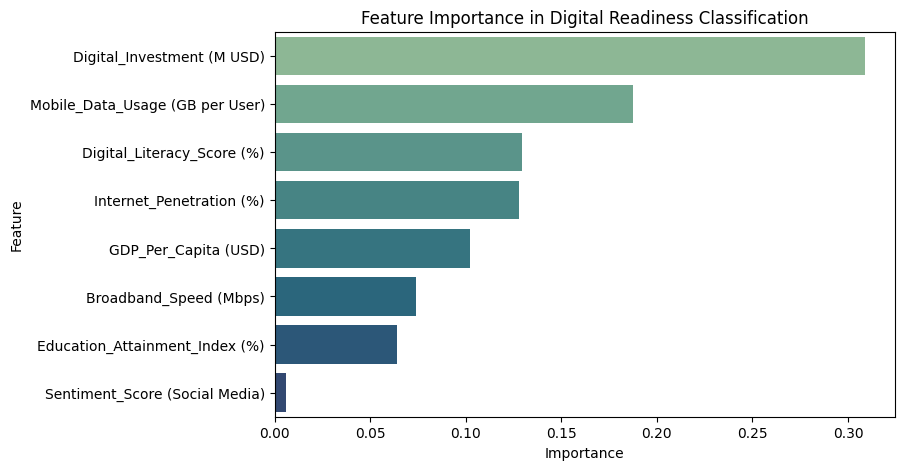


✅ FINAL MODEL SUMMARY
Training Accuracy: 99.97%
Testing Accuracy:  98.0%
Cross-Val Mean:    86.97%
OOB Score:         99.8%

Model successfully trained, validated, and evaluated!


In [ ]:
# ==========================================================
# 🧠 DIGITAL READINESS CLASSIFIER (Random Forest)
# ==========================================================
# Goal: Predict whether a country is digitally ready
# Tools: Python, Pandas, Scikit-learn, Matplotlib, Seaborn
# ==========================================================

# Step 0 – Install Required Libraries
!pip install pandas scikit-learn matplotlib seaborn

# Step 1 – Import Libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 – Load Dataset
df = pd.read_csv("enhanced_global_internet_adoption_monthly_2015_2025.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head())

# Step 3 – Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df.dropna(inplace=True)
print("✅ Cleaned dataset shape:", df.shape)

# Step 4 – Feature Scaling
features_to_scale = [
    'Internet_Penetration (%)',
    'Broadband_Speed (Mbps)',
    'GDP_Per_Capita (USD)',
    'Education_Attainment_Index (%)',
    'Mobile_Data_Usage (GB per User)',
    'Digital_Investment (M USD)',
    'Digital_Literacy_Score (%)',
    'Sentiment_Score (Social Media)'
]
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("✅ Features scaled successfully!")

# Step 5 – Compute Digital Readiness Score (DRS)
df['DRS'] = (
    0.25*df['Internet_Penetration (%)'] +
    0.25*df['Digital_Literacy_Score (%)'] +
    0.25*df['Mobile_Data_Usage (GB per User)'] +
    0.25*df['Digital_Investment (M USD)']
)
print("✅ DRS calculated successfully!")

# Step 6 – Create Target Label
df['Digitally_Ready'] = (df['DRS'] >= 0.7).astype(int)
print("✅ Target label created successfully!")
print(df['Digitally_Ready'].value_counts())

# Step 7 – Train/Test Split
train_df = df[df['Year'] <= 2024]
test_df  = df[df['Year'] == 2025]
X_train = train_df[features_to_scale]
y_train = train_df['Digitally_Ready']
X_test  = test_df[features_to_scale]
y_test  = test_df['Digitally_Ready']
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

# Step 8 – Model Training
rf = RandomForestClassifier(
    n_estimators=150, #uses 150 decision trees
    max_depth=8, #ensures the max level fo the tree doesn't exceed 8 as it leads to overfitting 
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    oob_score=True
)
rf.fit(X_train, y_train)
print("✅ Random Forest model trained successfully!")

# Step 9 – Model Evaluation
y_train_pred = rf.predict(X_train)
y_test_pred  = rf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("\n📊 MODEL PERFORMANCE")
print("Training Accuracy :", round(train_acc * 100, 2), "%")
print("Testing Accuracy  :", round(test_acc * 100, 2), "%")
print("OOB Score         :", round(rf.oob_score_ * 100, 2), "%")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Step 10 – Cross-Validation
cv_scores = cross_val_score(rf, df[features_to_scale], df['Digitally_Ready'], cv=5)
print("\n🔁 CROSS-VALIDATION")
print("Mean Accuracy :", round(cv_scores.mean()*100, 2), "%")
print("Fold Scores   :", [round(s*100, 2) for s in cv_scores])

# Step 11 – Overfitting Check
gap = train_acc - test_acc
print("\n🔎 OVERFITTING CHECK")
if gap < 0.03:
    print("✅ Model is balanced and generalizes well.")
elif gap < 0.1:
    print("⚠️ Slight overfitting, acceptable range.")
else:
    print("❌ Model is overfitting — consider tuning max_depth or min_samples_split.")

# Step 12 – Feature Importance Visualization
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': features_to_scale, 'Importance': importances})
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='crest')
plt.title("Feature Importance in Digital Readiness Classification")
plt.show()

# Step 13 – Final Summary
print("\n✅ FINAL MODEL SUMMARY")
print(f"Training Accuracy: {round(train_acc*100, 2)}%")
print(f"Testing Accuracy:  {round(test_acc*100, 2)}%")
print(f"Cross-Val Mean:    {round(cv_scores.mean()*100, 2)}%")
print(f"OOB Score:         {round(rf.oob_score_*100, 2)}%")
print("\nModel successfully trained, validated, and evaluated!")
